In [1]:
#import relevant packages
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np
import datetime

import seaborn as sns
sns.set()

C:\Users\hlovi\Anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\hlovi\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\hlovi\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"
C:\Users\hlovi\Anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\hlovi\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Open the data set

In [2]:
dou = pd.read_excel('base_dou.xlsx', sheet_name = 'Planilha Exec Legisl revisada') #open xlsx dataset
dou

C:\Users\hlovi\Anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


,base_limpa,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29
0,responsavel,idx,title,section,type,date,month,publisher,origin,agency,...,forma_mencao,domestico_internacional_ator_privado,hard_soft,mencao_oms_geral,mencao_imprecisa_a_doc,mencao_especifica_a_doc,local_da_mencao,doc_citado,obs,Observações Revisão Vinicius e Carla
1,Leonardo Chammas,9728,"PORTARIA Nº 4, DE 27 DE MARÇO DE 2020",S01,Portaria,2020-04-01,Abril,Entidades de Fiscalização do Exercício das Pro...,Entidades de Fiscalização do Exercício das Pro...,NaN,...,Direct,Documento internacional,Soft norm,No,Yes,No,Considerandos,Rational use of personal protective equipment ...,https://apps.who.int/iris/handle/10665/331215,NaN
2,Leonardo Chammas,9729,"PORTARIA Nº 4, de 31 de março de 2020",S01,Portaria,2020-04-01,Abril,Entidades de Fiscalização do Exercício das Pro...,Entidades de Fiscalização do Exercício das Pro...,NaN,...,Direct,Documento internacional,Soft norm,No,Yes,No,Considerandos,Declaration of Pandemic Status,https://www.who.int/director-general/speeches/...,NaN
3,Leonardo Chammas,9729,"PORTARIA Nº 4, de 31 de março de 2020",S01,Portaria,2020-04-01,Abril,Entidades de Fiscalização do Exercício das Pro...,Entidades de Fiscalização do Exercício das Pro...,NaN,...,Direct,Documento internacional,Soft norm,No,No,Yes,Considerandos,COVID-19 Public Health Emergency of Internatio...,NaN,NaN
4,Leonardo Chammas,9729,"PORTARIA Nº 4, de 31 de março de 2020",S01,Portaria,2020-04-01,Abril,Entidades de Fiscalização do Exercício das Pro...,Entidades de Fiscalização do Exercício das Pro...,NaN,...,Direct,Documento internacional,Soft norm,No,Yes,No,Considerandos,Rational use of personal protective equipment ...,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1070,Beatriz,3209661,"RESOLUÇÃO CREF4/SP nº 151, de 11 de julho de 2022",S01,Resolução,2022-07-12 00:00:00,NaN,Entidades de Fiscalização do Exercício das Pro...,Entidades de Fiscalização do Exercício das Pro...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1071,Beatriz,3210773,"RESOLUÇÃO COFEN Nº 702, de 15 de julho de 2022",S01,Resolução,2022-07-18 00:00:00,NaN,Entidades de Fiscalização do Exercício das Pro...,Entidades de Fiscalização do Exercício das Pro...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1072,Beatriz,3211564,"RESOLUÇÃO COFEN Nº 704, DE 19 DE JULHO DE 2022",S01,Resolução,2022-07-21 00:00:00,NaN,Entidades de Fiscalização do Exercício das Pro...,Entidades de Fiscalização do Exercício das Pro...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1073,Beatriz,3211641,"RESOLUÇÃO CREMERJ Nº 335, DE 14 DE JULHO DE 2022",S01,Resolução,2022-07-22 00:00:00,NaN,Entidades de Fiscalização do Exercício das Pro...,Entidades de Fiscalização do Exercício das Pro...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
dou.columns = dou.iloc[0].values #makes the columns (first row) useful queriable
dou = dou.drop(dou.index[0]) #drop the first row
dou

,responsavel,idx,title,section,type,date,month,publisher,origin,agency,...,forma_mencao,domestico_internacional_ator_privado,hard_soft,mencao_oms_geral,mencao_imprecisa_a_doc,mencao_especifica_a_doc,local_da_mencao,doc_citado,obs,Observações Revisão Vinicius e Carla
1,Leonardo Chammas,9728,"PORTARIA Nº 4, DE 27 DE MARÇO DE 2020",S01,Portaria,2020-04-01,Abril,Entidades de Fiscalização do Exercício das Pro...,Entidades de Fiscalização do Exercício das Pro...,NaN,...,Direct,Documento internacional,Soft norm,No,Yes,No,Considerandos,Rational use of personal protective equipment ...,https://apps.who.int/iris/handle/10665/331215,NaN
2,Leonardo Chammas,9729,"PORTARIA Nº 4, de 31 de março de 2020",S01,Portaria,2020-04-01,Abril,Entidades de Fiscalização do Exercício das Pro...,Entidades de Fiscalização do Exercício das Pro...,NaN,...,Direct,Documento internacional,Soft norm,No,Yes,No,Considerandos,Declaration of Pandemic Status,https://www.who.int/director-general/speeches/...,NaN
3,Leonardo Chammas,9729,"PORTARIA Nº 4, de 31 de março de 2020",S01,Portaria,2020-04-01,Abril,Entidades de Fiscalização do Exercício das Pro...,Entidades de Fiscalização do Exercício das Pro...,NaN,...,Direct,Documento internacional,Soft norm,No,No,Yes,Considerandos,COVID-19 Public Health Emergency of Internatio...,NaN,NaN
4,Leonardo Chammas,9729,"PORTARIA Nº 4, de 31 de março de 2020",S01,Portaria,2020-04-01,Abril,Entidades de Fiscalização do Exercício das Pro...,Entidades de Fiscalização do Exercício das Pro...,NaN,...,Direct,Documento internacional,Soft norm,No,Yes,No,Considerandos,Rational use of personal protective equipment ...,NaN,NaN
5,Leonardo Chammas,9729,"PORTARIA Nº 4, de 31 de março de 2020",S01,Portaria,2020-04-01,Abril,Entidades de Fiscalização do Exercício das Pro...,Entidades de Fiscalização do Exercício das Pro...,NaN,...,Direct,Documento internacional,Soft norm,No,Yes,No,Considerandos,Declaration of Pandemic Status,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1070,Beatriz,3209661,"RESOLUÇÃO CREF4/SP nº 151, de 11 de julho de 2022",S01,Resolução,2022-07-12 00:00:00,NaN,Entidades de Fiscalização do Exercício das Pro...,Entidades de Fiscalização do Exercício das Pro...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1071,Beatriz,3210773,"RESOLUÇÃO COFEN Nº 702, de 15 de julho de 2022",S01,Resolução,2022-07-18 00:00:00,NaN,Entidades de Fiscalização do Exercício das Pro...,Entidades de Fiscalização do Exercício das Pro...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1072,Beatriz,3211564,"RESOLUÇÃO COFEN Nº 704, DE 19 DE JULHO DE 2022",S01,Resolução,2022-07-21 00:00:00,NaN,Entidades de Fiscalização do Exercício das Pro...,Entidades de Fiscalização do Exercício das Pro...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1073,Beatriz,3211641,"RESOLUÇÃO CREMERJ Nº 335, DE 14 DE JULHO DE 2022",S01,Resolução,2022-07-22 00:00:00,NaN,Entidades de Fiscalização do Exercício das Pro...,Entidades de Fiscalização do Exercício das Pro...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# COVID-19 analysis

In [4]:
print(set(dou['mencao_covid'])) #check the possible answers to 'mencao_covid' question

{nan, True, 'Yes', 'No', 'FALSE'}


In [5]:
'''
For the nan documents, it was assumed the convention of letting the value of the entry be nan if equals the
value above. Therefore, to have a list of only 'Yes' and 'No', we run the following
'''
covid_list = dou['mencao_covid'].to_list()
covid_list_clean = []

for el in covid_list:
    if el == True:
        covid_list_clean.append('Yes')
    elif el == 'Yes':
        covid_list_clean.append('Yes')
    elif el == 'FALSE':
        covid_list_clean.append('No')
    elif el == 'No':
        covid_list_clean.append('No')
    else:
        covid_list_clean.append(covid_list_clean[-1])
        
print(len(covid_list), len(covid_list_clean)) #check if the new list has the same size as the previous one

dou['mencao_covid'] = covid_list_clean #changes the mencao_covid column to the new one

print(set(dou['mencao_covid'])) #check if it worked

1074 1074
{'Yes', 'No'}


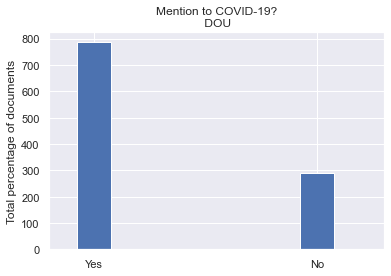

In [6]:
plt.bar(['Yes', 'No'], [len(dou[dou['mencao_covid'] == 'Yes']),len(dou[dou['mencao_covid'] == 'No'])], width = 0.15)
plt.xlim(-0.2,1.3)
plt.title('Mention to COVID-19?\n DOU')
plt.ylabel('Total percentage of documents')
plt.savefig('Graphs/covid.png',  bbox_inches='tight')
plt.show()

In [7]:
print('About ' + str(round(len(dou[dou['mencao_covid'] == 'Yes'])/len(dou)*100,2)) + '% of the documents mention COVID 19')

About 73.18% of the documents mention COVID 19


In [8]:
len(dou[dou['mencao_covid'] == 'Yes'])

786

# Major health issue 

In [9]:
hi = list(set(dou['major_health_issue']))
hi = hi[1:]
hi_count = []
for issue in hi:
    hi_count.append(len(dou[dou['major_health_issue'] == issue]))

In [10]:
len(hi_count), len(hi)

(45, 45)

In [11]:
hi_dic = {'Issue': hi, 'Count': hi_count}
hi_dt = pd.DataFrame(data = hi_dic)
hi_dt

,Issue,Count
0,Congenital anomalies,1
1,Health Budget,2
2,Physical activity,1
3,"Environmental crisis (global warming, pollution…)",2
4,Cancer,1
5,COVID-19,654
6,Healt Budget,1
7,Health System Governance,1
8,Occupational health,3
9,"Eye care, vision impairment and blindness",4


In [12]:
hi_big = hi_dt[hi_dt['Count'] > 5]
hi_big.reset_index(drop=True, inplace=True)
hi_big

,Issue,Count
0,COVID-19,654
1,Food Safety,6
2,Health crisis (in general),20
3,Other (specify),144
4,Vaccines and immunization,13
5,Tobacco,9
6,Health Security,6
7,Coronavirus disease (COVID-19),84
8,Mental and behavioral disorders,14
9,Health system governance,6


In [13]:
hi_big = hi_big.drop(hi_big.index[[5,9]])
hi_big

,Issue,Count
0,COVID-19,654
1,Food Safety,6
2,Health crisis (in general),20
3,Other (specify),144
4,Vaccines and immunization,13
6,Health Security,6
7,Coronavirus disease (COVID-19),84
8,Mental and behavioral disorders,14


In [14]:
corona = hi_dt[hi_dt['Issue'] == 'COVID-19']['Count'].iloc[0] + hi_dt[hi_dt['Issue'] == 'Corona Virus Disease']['Count'].iloc[0] +  hi_dt[hi_dt['Issue'] == 'Coronavirus disease (COVID-19)']['Count'].iloc[0]
other = hi_big[hi_big['Issue'] == 'Other (specify)']['Count'].iloc[0] + len(hi_dt[hi_dt['Count'] <= 5])

In [15]:
issues = ['COVID 19', 'Food Safety', 'Health Crisis', 'Health Security', 'Health System Governance', 'Other',
          'Mental and Behavioral \nDisorders', 'Tobacco', 'Vaccines and Immunization']
count = [corona, 6, 20, 6, 6, other, 14, 9, 13]

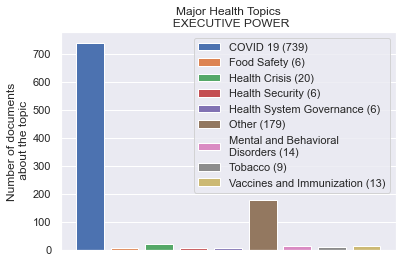

In [16]:
fig, ax =  plt.subplots(1,1) 
for i, isssue in enumerate(count):
    ax.bar(i, isssue, label = issues[i] + ' (' + str(isssue) + ')')
ax.set_ylabel('Number of documents\n about the topic')
ax.set_title('Major Health Topics\n  EXECUTIVE POWER')
ax.axes.get_xaxis().set_ticks([])
ax.legend()
plt.savefig('Graphs/major_health.png',  bbox_inches='tight')
plt.show()

# Documents

In [17]:
pandemic_status = 0
int_concern = 0
joint_fao = 0 
technical_guidance = 0
pheic = 0
codex_alimentarius = 0
ds = 0
other = 0

for el in list(dou['doc_citado']):
    if type(el) == str:
        if ('Declaration of Pandemic Status' in el) or (el == 'DPS'):
            pandemic_status += 1
        if 'COVID-19 Public Health Emergency of International Concern' in el:
            int_concern += 1
        if 'Joint FAO/WHO Meeting on Pesticide Residues' in el:
            joint_fao += 1
        if "WHO's Technical guidance on COVID-19" in el:
            technical_guidance += 1
        if 'PHEIC' in el:
            pheic += 1
        if 'Codex Alimentarius' in el:
            codex_alimentarius += 1
        if 'Classification of Diseases' in el:
            ds += 1
        else:
            other += 1

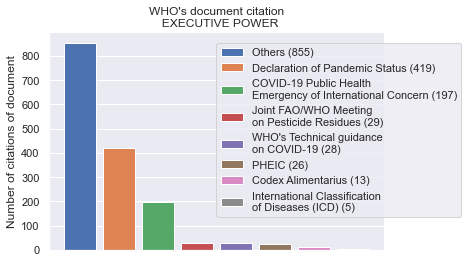

In [18]:
fig, ax =  plt.subplots(1,1)
ax.bar(-1, other, label = 'Others' + ' (' + str(other)+ ')')
ax.bar(0, pandemic_status, label = 'Declaration of Pandemic Status' + ' (' + str(pandemic_status)+ ')')
ax.bar(1, int_concern, label = 'COVID-19 Public Health \nEmergency of International Concern' + ' (' + str(int_concern)+ ')')
ax.bar(2, joint_fao, label = 'Joint FAO/WHO Meeting \non Pesticide Residues' + ' (' + str(joint_fao)+ ')')
ax.bar(3, technical_guidance, label = "WHO's Technical guidance \non COVID-19"+ ' (' + str(technical_guidance)+ ')')
ax.bar(4, pheic, label = 'PHEIC'+ ' (' + str(pheic)+ ')')
ax.bar(5, codex_alimentarius, label = 'Codex Alimentarius'+ ' (' + str(codex_alimentarius)+ ')')
ax.bar(6, ds, label = 'International Classification \nof Diseases (ICD)'+ ' (' + str(ds)+ ')')


ax.set_ylabel('Number of citations of document')
ax.set_title("WHO's document citation\n  EXECUTIVE POWER")
ax.legend(loc = (0.5, 0.15))
ax.axes.get_xaxis().set_ticks([])
plt.savefig('Graphs/doc_citado.png', bbox_inches='tight')
plt.show()

# Hard v. soft

In [19]:
set(dou['hard_soft'])

{'Hard norm', 'Soft norm', nan}

In [20]:
hard = len(dou[dou['hard_soft'] == 'Hard norm'])
soft = len(dou[dou['hard_soft'] == 'Soft norm'])

hard_covid = len(dou[(dou['hard_soft'] == 'Hard norm') & (dou['mencao_covid'] == 'Yes')])
soft_covid = len(dou[(dou['hard_soft'] == 'Soft norm') & (dou['mencao_covid'] == 'Yes')])

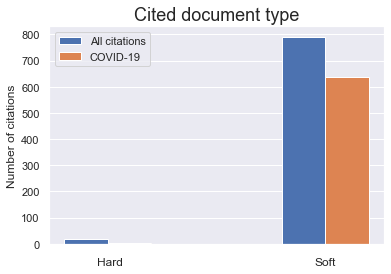

In [21]:
width = 0.2
fig, ax = plt.subplots(1,1)

ax.bar([0,1], height=[hard, soft], width=width,  label = 'All citations')
ax.bar([0 + width,1 + width], height=[hard_covid, soft_covid], width=width, label = 'COVID-19')
#ax.set_xticklabels(['Hard', 'Soft'], rotation='vertical', fontsize= 9)
ax.text(0.05, -80, 'Hard')
ax.text(1.05, -80, 'Soft')

ax.axes.get_xaxis().set_ticks([])


ax.set_title('Cited document type', fontsize=18)
ax.set_ylabel('Number of citations')
ax.legend()
plt.savefig('Graphs/hardvsoft.png')
plt.show()

# Cites specific document

In [22]:
set(dou['mencao_especifica_a_doc'])

{'No', 'Yes', nan}

In [23]:
sp = len(dou[dou['mencao_especifica_a_doc'] == 'Yes'])
nsp = len(dou[dou['mencao_especifica_a_doc'] == 'No'])

sp_covid = len(dou[(dou['mencao_especifica_a_doc'] == 'Yes') & (dou['mencao_covid'] == 'Yes')])
nsp_covid = len(dou[(dou['mencao_especifica_a_doc'] == 'No') & (dou['mencao_covid'] == 'Yes')])

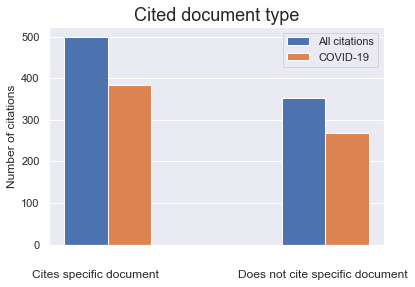

In [24]:
width = 0.2
fig, ax = plt.subplots(1,1)

ax.bar([0,1], height=[sp, nsp], width=width,  label = 'All citations')
ax.bar([0 + width,1 + width], height=[sp_covid, nsp_covid], width=width, label = 'COVID-19')
#ax.set_xticklabels(['Hard', 'Soft'], rotation='vertical', fontsize= 9)
ax.text(-0.25, -80, 'Cites specific document')
ax.text(0.70, -80, 'Does not cite specific document')

ax.axes.get_xaxis().set_ticks([])


ax.set_title('Cited document type', fontsize=18)
ax.set_ylabel('Number of citations')
ax.legend()
plt.savefig('Graphs/doc_especifico.png')
plt.show()

# Mention location

In [25]:
dou['local_da_mencao'].value_counts()

Considerandos                           615
Normativa                               165
Nota explicativa                         18
Ata de sessão de julgamento do TCU       10
Exposição de motivos                     10
Ementa                                    7
Especificação técnica para aquisição      6
Modelo de documento                       6
Motivação                                 6
Nota Técnica                              5
Nota - Eventos subsequentes               4
Ata de reunião                            3
Referências                               3
Decisão                                   3
Preâmbulo                                 3
Título                                    2
Norma técnica para aquisições             2
Lista de normas vigentes                  2
Quadro de referências                     1
Justificativa                             1
Lista de medicamentos                     1
Manifestação                              1
Ata de reunião remota           

In [26]:
local = ['Considerandos', 'Normativa', 'Nota explicativa', 'Ata de sessão de julgamento do TCU', 
         'Exposição de motivos']
loc_occ = [615, 165, 18, 10, 10]
loc_occ.append(len(dou[~dou['local_da_mencao'].isin(local)]))
local.append('Others')
local

['Considerandos',
 'Normativa',
 'Nota explicativa',
 'Ata de sessão de julgamento do TCU',
 'Exposição de motivos',
 'Others']

In [27]:
local = ['Considerandos',
 'Normativa',
 'Nota explicativa',
 'Ata de sessão \nde julgamento do TCU',
 'Exposição de motivos',
 'Others']

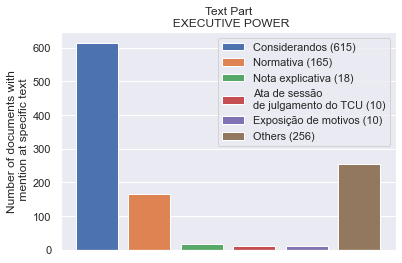

In [28]:
fig, ax =  plt.subplots(1,1) 
for i, loc in enumerate(loc_occ):
    ax.bar(i, loc, label = local[i] + ' (' + str(loc) + ')')
ax.set_ylabel('Number of documents with\n mention at specific text')
ax.set_title('Text Part\n  EXECUTIVE POWER')
ax.axes.get_xaxis().set_ticks([])
ax.legend()
plt.savefig('Graphs/local_de_mencao.png', bbox_inches='tight')
plt.show()

# Author

In [29]:
dou['origin'].value_counts()[:10]

Entidades de Fiscalização do Exercício das Profissões Liberais    349
Ministério da Saúde                                               170
Ministério da Cidadania                                            72
Ministério da Infraestrutura                                       42
Ministério da Economia                                             41
Presidência da República                                           38
Ministério da Educação                                             29
Atos do Poder Executivo                                            23
Ministério da Mulher, da Família e dos Direitos Humanos            22
Ministério do Meio Ambiente                                        21
Name: origin, dtype: int64

In [30]:
set(dou['origin'])

{'/Ministério Público do Distrito Federal e Territórios/Procuradoria-Geral de Justiça/Coordenadorias das Promotorias de Justiça',
 'Agência Nacional de Saúde Suplementar',
 'Agência Nacional de Vigilância Sanitária/Diretoria Colegiada',
 'Atos do Poder Executivo',
 'Atos do Poder Judiciário',
 'Atos do Poder Legislativo',
 'Banco do Brasil S.A.',
 'Banco do Brasil S.A./BB Seguridade Participações S.A.',
 'Banco do Brasil S.A./Unidade de Contadoria',
 'Casa da Moeda do Brasil',
 'Comitê-Executivo de Gestão',
 'Conselho Federal de Farmácia',
 'Conselho Federal de Serviço Social',
 'Conselho Nacional de Saúde',
 'Conselho Nacional do Ministério Público',
 'Controladoria-Geral da União',
 'Câmara de Comércio Exterior/Comitê-Executivo de Gestão',
 'Diretoria Colegiada',
 'Empresa Brasil de Comunicação S.A.',
 'Empresa Brasileira de Infraestrutura Aeroportuária/Diretoria de Soluções Jurídicas e Administrativas/Superintendência de Administração/Gerência de Logística Administrativa',
 'Entidad

In [31]:
min_saude = 0
exerc_prof_liberais = 0
min_cid = 0
min_infra = 0
min_eco = 0
pr = 0
min_ed = 0
ae = 0
other = 0

for el in list(dou['origin']):
    if type(el) == str:
        if 'Ministério da Saúde' in el:
            min_saude += 1
        elif 'Entidades de Fiscalização do Exercício das Profissões Liberais' in el:
            exerc_prof_liberais += 1
        elif 'Ministério da Cidadania' in el:
            min_cid += 1
        elif 'Ministério da Infraestrutura' in el:
            min_infra += 1
        elif 'Ministério da Economia' in el:
            min_eco += 1
        elif 'Presidência da República' in el:
            pr += 1
        elif 'Ministério da Educação' in el:
            min_ed += 1
        elif 'Atos do Poder Executivo' in el:
            ae += 1
        else:
            other += 1
            

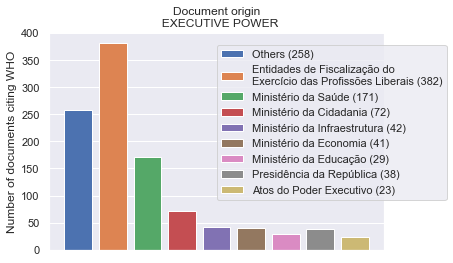

In [32]:
fig, ax =  plt.subplots(1,1)
ax.bar(-1, other, label = 'Others' + ' (' + str(other)+ ')')
ax.bar(0, exerc_prof_liberais, label = 'Entidades de Fiscalização do \nExercício das Profissões Liberais' + ' (' + str(exerc_prof_liberais)+ ')')
ax.bar(1, min_saude, label = 'Ministério da Saúde' + ' (' + str(min_saude)+ ')')
ax.bar(2, min_cid, label = 'Ministério da Cidadania' + ' (' + str(min_cid)+ ')')
ax.bar(3, min_infra, label = "Ministério da Infraestrutura"+ ' (' + str(min_infra)+ ')')
ax.bar(4, min_eco, label = 'Ministério da Economia'+ ' (' + str(min_eco)+ ')')
ax.bar(5, min_ed, label = 'Ministério da Educação'+ ' (' + str(min_ed)+ ')')
ax.bar(6, pr, label = 'Presidência da República'+ ' (' + str(pr)+ ')')
ax.bar(7, ae, label = 'Atos do Poder Executivo'+ ' (' + str(ae)+ ')')


ax.set_ylabel('Number of documents citing WHO')
ax.set_title("Document origin\n  EXECUTIVE POWER")
ax.legend(loc = (0.5, 0.23))
ax.axes.get_xaxis().set_ticks([])
plt.savefig('Graphs/origins.png', bbox_inches='tight')
plt.show()

In [33]:
exerc_prof_liberais

382

# Dates

In [34]:
missing = dou[dou['title'].isna()]
missing.to_excel('missing_title.xlsx')

<ipython-input-34-462a60339eca>:2: UserWarning: Pandas requires version '1.4.3' or newer of 'xlsxwriter' (version '1.3.7' currently installed).
  missing.to_excel('missing_title.xlsx')


In [35]:
dou[dou['date'].isna()]

,responsavel,idx,title,section,type,date,month,publisher,origin,agency,...,forma_mencao,domestico_internacional_ator_privado,hard_soft,mencao_oms_geral,mencao_imprecisa_a_doc,mencao_especifica_a_doc,local_da_mencao,doc_citado,obs,Observações Revisão Vinicius e Carla
950,Leonardo,2845483,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
951,Leonardo,2845483,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
954,Leonardo,2846187,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
961,Leonardo,3075482,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
965,Leonardo,3076323,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
966,Leonardo,3076323,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
978,Leonardo,3079078,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DPS,NaN,NaN
979,Leonardo,3079078,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
985,Leonardo,3082020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
986,Leonardo,3082020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
dates = dou['date'].to_list() #again, we clean the dates variables
dates_clean = []

for el in dates:
    if el == 'IDEM':
        dates_clean.append(dates_clean[-1])
    else:
        dates_clean.append(el)

print(len(dates), len(dates_clean)) #check if all went well


'''Change the column of the data set to a clean list'''
dou['date'] = dates_clean
dou_dates = dou.copy()
dou_dates.dropna(subset=['date'], how='all', inplace=True)


'''Puts all dates in same format'''
dates = list(dou_dates['date'])
dates_new = []
dates_in_order = []

for date in dates:
    try:
        dates_new.append(str(date).split()[0].split('-')[0] + '-' + str(date).split()[0].split('-')[1])
    except:
        dates_new.append(str(date).split()[0].split('/')[0] + '-' + str(date).split()[0].split('/')[1])

print(len(dates_new), len(dates))

dou_dates['date'] = dates_new
dou_dates['date'] = dou_dates['date'].replace(['3-31'], '2022-03') #just an error
dou_dates[dou_dates['date'] == '3-31']

1074 1074
1055 1055


,responsavel,idx,title,section,type,date,month,publisher,origin,agency,...,forma_mencao,domestico_internacional_ator_privado,hard_soft,mencao_oms_geral,mencao_imprecisa_a_doc,mencao_especifica_a_doc,local_da_mencao,doc_citado,obs,Observações Revisão Vinicius e Carla


In [37]:
dou_dates

,responsavel,idx,title,section,type,date,month,publisher,origin,agency,...,forma_mencao,domestico_internacional_ator_privado,hard_soft,mencao_oms_geral,mencao_imprecisa_a_doc,mencao_especifica_a_doc,local_da_mencao,doc_citado,obs,Observações Revisão Vinicius e Carla
1,Leonardo Chammas,9728,"PORTARIA Nº 4, DE 27 DE MARÇO DE 2020",S01,Portaria,2020-04,Abril,Entidades de Fiscalização do Exercício das Pro...,Entidades de Fiscalização do Exercício das Pro...,NaN,...,Direct,Documento internacional,Soft norm,No,Yes,No,Considerandos,Rational use of personal protective equipment ...,https://apps.who.int/iris/handle/10665/331215,NaN
2,Leonardo Chammas,9729,"PORTARIA Nº 4, de 31 de março de 2020",S01,Portaria,2020-04,Abril,Entidades de Fiscalização do Exercício das Pro...,Entidades de Fiscalização do Exercício das Pro...,NaN,...,Direct,Documento internacional,Soft norm,No,Yes,No,Considerandos,Declaration of Pandemic Status,https://www.who.int/director-general/speeches/...,NaN
3,Leonardo Chammas,9729,"PORTARIA Nº 4, de 31 de março de 2020",S01,Portaria,2020-04,Abril,Entidades de Fiscalização do Exercício das Pro...,Entidades de Fiscalização do Exercício das Pro...,NaN,...,Direct,Documento internacional,Soft norm,No,No,Yes,Considerandos,COVID-19 Public Health Emergency of Internatio...,NaN,NaN
4,Leonardo Chammas,9729,"PORTARIA Nº 4, de 31 de março de 2020",S01,Portaria,2020-04,Abril,Entidades de Fiscalização do Exercício das Pro...,Entidades de Fiscalização do Exercício das Pro...,NaN,...,Direct,Documento internacional,Soft norm,No,Yes,No,Considerandos,Rational use of personal protective equipment ...,NaN,NaN
5,Leonardo Chammas,9729,"PORTARIA Nº 4, de 31 de março de 2020",S01,Portaria,2020-04,Abril,Entidades de Fiscalização do Exercício das Pro...,Entidades de Fiscalização do Exercício das Pro...,NaN,...,Direct,Documento internacional,Soft norm,No,Yes,No,Considerandos,Declaration of Pandemic Status,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1070,Beatriz,3209661,"RESOLUÇÃO CREF4/SP nº 151, de 11 de julho de 2022",S01,Resolução,2022-07,NaN,Entidades de Fiscalização do Exercício das Pro...,Entidades de Fiscalização do Exercício das Pro...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1071,Beatriz,3210773,"RESOLUÇÃO COFEN Nº 702, de 15 de julho de 2022",S01,Resolução,2022-07,NaN,Entidades de Fiscalização do Exercício das Pro...,Entidades de Fiscalização do Exercício das Pro...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1072,Beatriz,3211564,"RESOLUÇÃO COFEN Nº 704, DE 19 DE JULHO DE 2022",S01,Resolução,2022-07,NaN,Entidades de Fiscalização do Exercício das Pro...,Entidades de Fiscalização do Exercício das Pro...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1073,Beatriz,3211641,"RESOLUÇÃO CREMERJ Nº 335, DE 14 DE JULHO DE 2022",S01,Resolução,2022-07,NaN,Entidades de Fiscalização do Exercício das Pro...,Entidades de Fiscalização do Exercício das Pro...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
'''Makes a list of all relevant dates'''
months_all = [str(i) if len(str(i)) == 2 else '0' + str(i) for i in range(1,13)]
months_jul = [ '0' + str(i) for i in range(1,8)] #we stop in July 2022
years = [str(i) for i in range(2018, 2023)] 

months_and_years = []
for year in years:
    if year != '2022':
        for month in months_all:
            months_and_years.append(year + '-' + month)
    else:
        for month in months_jul:
            months_and_years.append(year + '-' + month)
months_and_years

['2018-01',
 '2018-02',
 '2018-03',
 '2018-04',
 '2018-05',
 '2018-06',
 '2018-07',
 '2018-08',
 '2018-09',
 '2018-10',
 '2018-11',
 '2018-12',
 '2019-01',
 '2019-02',
 '2019-03',
 '2019-04',
 '2019-05',
 '2019-06',
 '2019-07',
 '2019-08',
 '2019-09',
 '2019-10',
 '2019-11',
 '2019-12',
 '2020-01',
 '2020-02',
 '2020-03',
 '2020-04',
 '2020-05',
 '2020-06',
 '2020-07',
 '2020-08',
 '2020-09',
 '2020-10',
 '2020-11',
 '2020-12',
 '2021-01',
 '2021-02',
 '2021-03',
 '2021-04',
 '2021-05',
 '2021-06',
 '2021-07',
 '2021-08',
 '2021-09',
 '2021-10',
 '2021-11',
 '2021-12',
 '2022-01',
 '2022-02',
 '2022-03',
 '2022-04',
 '2022-05',
 '2022-06',
 '2022-07']

In [39]:
dates_covid = dou_dates[dou_dates['mencao_covid'] == 'Yes']['date'].to_list()
dates_no_covid = dou_dates[dou_dates['mencao_covid'] == 'No']['date'].to_list()

count_month_covid = []
count_month_no_covid = []

for month in months_and_years:
    count_month_covid.append(dates_covid.count(month))
    count_month_no_covid.append(dates_no_covid.count(month))
    
print(len(months_and_years), len(count_month_covid), len(count_month_no_covid))

55 55 55


In [ ]:
count_month_covid = np.array(count_month_covid)
count_month_no_covid = np.array(count_month_no_covid)

fig, ax = plt.subplots(1,1)
fig.set_size_inches(20, 5)
ax.plot(months_and_years, count_month_covid, '-o', label = 'Mentions COVID-19')
ax.plot(months_and_years, count_month_no_covid, '-o', label = 'Does not mention COVID-19')
ax.bar(months_and_years, count_month_covid + count_month_no_covid, color = 'gray', alpha = 0.5,
      label = 'All mentions')
ax.set_xticks(range(len(months_and_years)))
ax.set_xticklabels(months_and_years, rotation='vertical', fontsize= 10)
ax.set_ylabel('Monthly number of citations to WHO',  fontsize= 15)
ax.set_title('Citations to WHO\n DOU',  fontsize= 15)
plt.legend()

plt.savefig('Graphs/citacoes_mes.png',  bbox_inches='tight')
plt.show()

# ARMA model

In [ ]:
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

In [ ]:
plot_acf(count_month_no_covid, zero = False , lags = 13, title = 'Autocorrelation non-COVID-19')

In [ ]:
plot_pacf(count_month_no_covid, zero =  False, lags = 13, title = 'Partial Autocorrelation non-COVID-19')

In [ ]:
diff_count_month_no_covid = []
for i in range(1,len(count_month_no_covid)-1):
    diff_count_month_no_covid.append(count_month_no_covid[i+1]-count_month_no_covid[i])

In [ ]:
plot_acf(diff_count_month_no_covid, zero = False , lags = 13, title = 'Autocorrelation non-COVID-19')

In [ ]:
plot_pacf(diff_count_month_no_covid, zero = False , lags = 13, title = 'Autocorrelation non-COVID-19')